In [2]:
import numpy as np
import pandas as pd
import nsepy as nse
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
start = pd.to_datetime('2012-01-01')
end = pd.to_datetime('2017-01-01')

In [17]:
import quandl

In [18]:
aapl = quandl.get('WIKI/AAPL.11', start_date = start, end_date = end)
cisco = quandl.get('WIKI/CSCO.11', start_date = start, end_date = end)
ibm = quandl.get('WIKI/IBM.11', start_date = start, end_date = end)
amzn = quandl.get('WIKI/AMZN.11', start_date = start, end_date = end)

In [36]:
 aapl.head()

,Adj. Close
Date,
2012-01-03,52.848787
2012-01-04,53.132802
2012-01-05,53.722681
2012-01-06,54.284287
2012-01-09,54.198183


In [48]:
aapl.iloc[0]['Adj. Close']

52.848786580038

In [50]:
# Finding Cumulative Returns

for stock_df in (aapl, cisco, ibm, amzn):
    stock_df['Normed Return'] = stock_df['Adj. Close'] / stock_df.iloc[0]['Adj. Close']

In [55]:
amzn

,Adj. Close,Normed Return
Date,,
2012-01-03,179.03,1.000000
2012-01-04,177.51,0.991510
2012-01-05,177.61,0.992068
2012-01-06,182.61,1.019997
2012-01-09,178.56,0.997375
...,...,...
2016-12-23,760.59,4.248394
2016-12-27,771.40,4.308775
2016-12-28,772.13,4.312853


In [56]:
# Pretend we have anallocation like
# 30% in apple
# 20% in cisco
# 40% in amazon
# 10% in ibm

In [59]:
for stock_df, allo in zip((aapl, cisco, ibm, amzn),[0.3,0.2,0.4,0.1]):
    stock_df['Allocation'] = stock_df['Normed Return']*allo

In [60]:
aapl.head()

,Adj. Close,Normed Return,Allocation
Date,,,
2012-01-03,52.848787,1.000000,0.300000
2012-01-04,53.132802,1.005374,0.301612
2012-01-05,53.722681,1.016536,0.304961
2012-01-06,54.284287,1.027162,0.308149
2012-01-09,54.198183,1.025533,0.307660


In [61]:
for stock_df in (aapl, cisco, ibm, amzn):
    stock_df['Position Value'] = stock_df['Allocation']*1000000
# Say my portfolio investment is 1 million 

In [62]:
aapl.head()

,Adj. Close,Normed Return,Allocation,Position Value
Date,,,,
2012-01-03,52.848787,1.000000,0.300000,300000.000000
2012-01-04,53.132802,1.005374,0.301612,301612.236461
2012-01-05,53.722681,1.016536,0.304961,304960.727573
2012-01-06,54.284287,1.027162,0.308149,308148.724558
2012-01-09,54.198183,1.025533,0.307660,307659.946988


In [63]:
all_pos_vals = [aapl['Position Value'], cisco['Position Value'], ibm['Position Value'], amzn['Position Value']]
portfolio_val = pd.concat(all_pos_vals, axis = 1)

In [65]:
portfolio_val.columns = ['AAPL Pos', 'CSCO Pos', 'IBM Pos', 'AMZN Pos']

In [67]:
portfolio_val['Total Pos'] = portfolio_val.sum(axis = 1)

<AxesSubplot:title={'center':'Total Portfolio Value'}, xlabel='Date'>

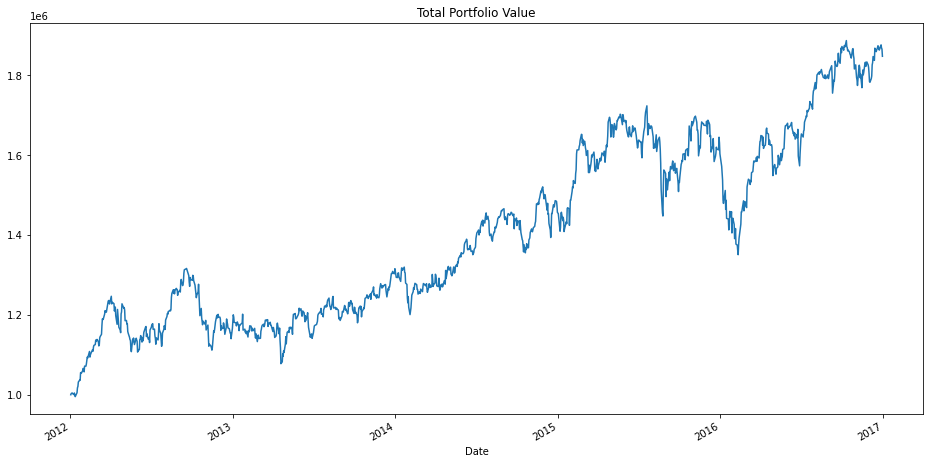

In [69]:
portfolio_val['Total Pos'].plot(figsize=(16,8), title = 'Total Portfolio Value')

<AxesSubplot:xlabel='Date'>

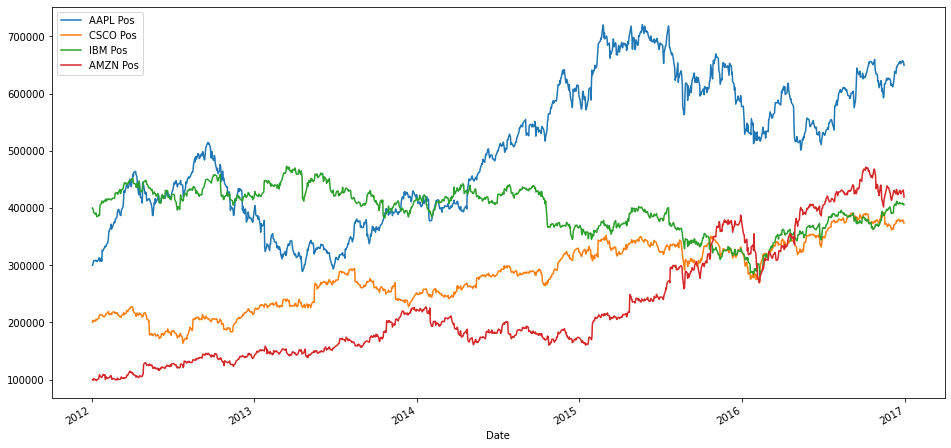

In [71]:
portfolio_val.drop('Total Pos', axis=1).plot(figsize=(16,8))

In [72]:
portfolio_val['Daily Return'] = portfolio_val['Total Pos'].pct_change(1)

In [75]:
portfolio_val['Daily Return'].mean()

0.0005442330716215244

In [76]:
portfolio_val['Daily Return'].std()

0.010568287769161725

<AxesSubplot:ylabel='Frequency'>

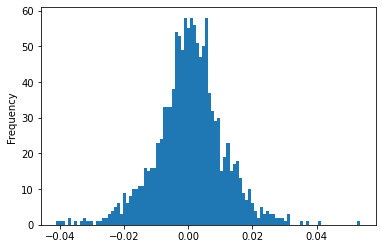

In [79]:
portfolio_val['Daily Return'].plot(kind='hist', bins = 100)

<AxesSubplot:ylabel='Density'>

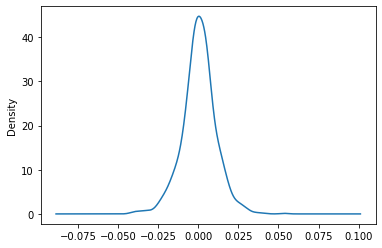

In [80]:
portfolio_val['Daily Return'].plot(kind='kde')

In [82]:
portfolio_val

,AAPL Pos,CSCO Pos,IBM Pos,AMZN Pos,Total Pos,Daily Return
Date,,,,,,
2012-01-03,300000.000000,200000.000000,400000.000000,100000.000000,1.000000e+06,NaN
2012-01-04,301612.236461,203864.734300,398368.223296,99150.980283,1.002996e+06,0.002996
2012-01-05,304960.727573,203113.258186,396478.797638,99206.836843,1.003760e+06,0.000761
2012-01-06,308148.724558,202361.782072,391926.999463,101999.664861,1.004437e+06,0.000675
2012-01-09,307659.946988,203650.026838,389887.278583,99737.474166,1.000935e+06,-0.003487
...,...,...,...,...,...,...
2016-12-23,653264.617079,377469.015679,407359.955612,424839.412389,1.862933e+06,-0.001025
2016-12-27,657413.396830,379323.596496,408410.671112,430877.506563,1.876025e+06,0.007028
2016-12-28,654610.167268,376108.989746,406089.322915,431285.259454,1.868094e+06,-0.004228


In [87]:
cumulative_return = 100*(portfolio_val['Total Pos'][-1]/portfolio_val['Total Pos'][0] - 1)

In [88]:
cumulative_return

84.74285181665545

In [89]:
# Our return is 84.74% on top of what we started with 

In [91]:
# Sharpe Ratio = measure to calculate risk adjusted return

In [92]:
# Assuming Rf (Risk Free Rate) = 0%

In [93]:
SR = portfolio_val['Daily Return'].mean() / portfolio_val['Daily Return'].std()

In [94]:
SR

0.05149680662648089

In [95]:
# Annualised Sharpe Ratio
# 252 = No. of Business Days in the USA

ASR = np.sqrt(252)*SR

In [96]:
ASR

0.817486461885909

In [97]:
# ASR > 1 is generally conidered good by investors
# ASR > 2 is rated very good
# ASR > 3 is excellent

In [98]:
# Portfolio Optimisation

In [101]:
aapl = pd.read_csv('AAPL_CLOSE', index_col= 'Date', parse_dates=True)
cisco = pd.read_csv('CISCO_CLOSE', index_col= 'Date', parse_dates=True)
ibm = pd.read_csv('IBM_CLOSE', index_col= 'Date', parse_dates=True)
amzn = pd.read_csv('AMZN_CLOSE', index_col= 'Date', parse_dates=True)

In [104]:
stocks = pd.concat([aapl, cisco, ibm, amzn], axis = 1)
stocks.columns = ['aapl', 'cisco', 'ibm', 'amzn']

In [105]:
stocks

,aapl,cisco,ibm,amzn
Date,,,,
2012-01-03,53.063218,15.752778,160.830881,179.03
2012-01-04,53.348386,16.057180,160.174781,177.51
2012-01-05,53.940658,15.997991,159.415086,177.61
2012-01-06,54.504543,15.938801,157.584912,182.61
2012-01-09,54.418089,16.040268,156.764786,178.56
...,...,...,...,...
2016-12-23,115.547742,29.730928,163.790152,760.59
2016-12-27,116.281568,29.877002,164.212620,771.40
2016-12-28,115.785740,29.623807,163.279259,772.13


In [106]:
# Mean Daily Return

stocks.pct_change(1).mean()

aapl     0.000750
cisco    0.000599
ibm      0.000081
amzn     0.001328
dtype: float64

In [107]:
stocks.pct_change(1).corr()

,aapl,cisco,ibm,amzn
aapl,1.000000,0.301990,0.297498,0.235487
cisco,0.301990,1.000000,0.424672,0.284470
ibm,0.297498,0.424672,1.000000,0.258492
amzn,0.235487,0.284470,0.258492,1.000000


In [108]:
# Arithmetic Returns 
stocks.pct_change(1).head()

,aapl,cisco,ibm,amzn
Date,,,,
2012-01-03,NaN,NaN,NaN,NaN
2012-01-04,0.005374,0.019324,-0.004079,-0.008490
2012-01-05,0.011102,-0.003686,-0.004743,0.000563
2012-01-06,0.010454,-0.003700,-0.011481,0.028152
2012-01-09,-0.001586,0.006366,-0.005204,-0.022178


In [109]:
# Log Returns
log_ret = np.log(stocks/stocks.shift(1))
log_ret.head()

,aapl,cisco,ibm,amzn
Date,,,,
2012-01-03,NaN,NaN,NaN,NaN
2012-01-04,0.005360,0.019139,-0.004088,-0.008526
2012-01-05,0.011041,-0.003693,-0.004754,0.000563
2012-01-06,0.010400,-0.003707,-0.011547,0.027763
2012-01-09,-0.001587,0.006346,-0.005218,-0.022428


In [110]:
# Check that here both Arithmetic and Log returns are very similar

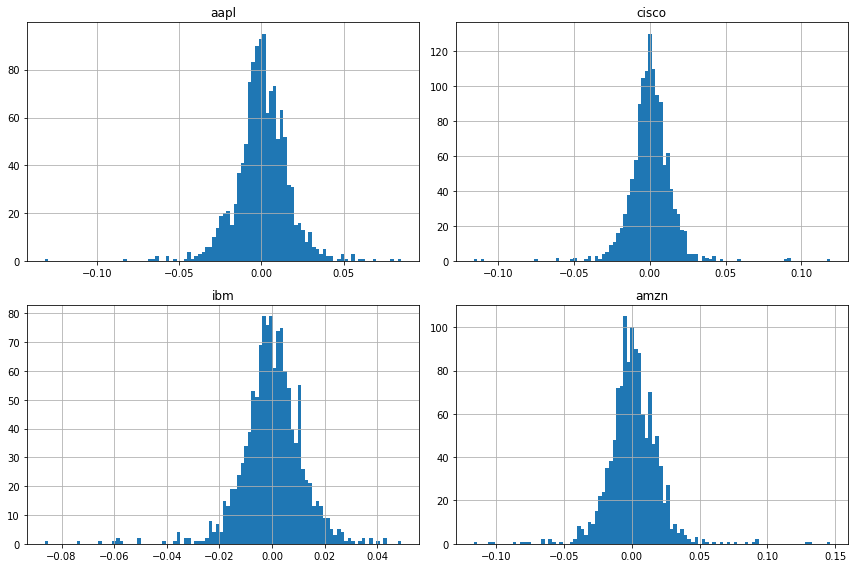

In [113]:
log_ret.hist(bins=100, figsize=(12,8))
plt.tight_layout()

In [115]:
log_ret.cov() * 252 

,aapl,cisco,ibm,amzn
aapl,0.068326,0.017854,0.014464,0.018986
cisco,0.017854,0.051381,0.018029,0.019956
ibm,0.014464,0.018029,0.035203,0.014939
amzn,0.018986,0.019956,0.014939,0.094470


In [118]:
# Randomising the weights (allocation weights)
np.random.seed(101)
print(stocks.columns)

weights = np.array(np.random.random(4))
weights = weights/np.sum(weights)
print('Random Weights')
print(weights)

# Sharpe Ratio = Expected Portfolio Return / Expected Volatility 
# Considering Rf = 0

# Expected Return

print('Expected Portfolio Return')
exp_ret = np.sum(log_ret.mean()*weights*252)
print(exp_ret)
#  Expected Volatility (i.e, Variance)
print('Expected Volatility')
exp_vol = np.sqrt(np.dot(weights.T, np.dot(log_ret.cov()*252, weights)))
print(exp_vol)
print('Sharpe Ratio')
SR = exp_ret/exp_vol
print(SR)

Index(['aapl', 'cisco', 'ibm', 'amzn'], dtype='object')
Random Weights
[0.40122278 0.44338777 0.02212343 0.13326603]
Expected Portfolio Return
0.15599272049632004
Expected Volatility
0.18502649565909488
Sharpe Ratio
0.8430831483926032


In [119]:
# Let's simulate it 1000s of times

In [122]:

num_portfolios = 5000
all_weights = np.zeros((num_portfolios, len(stocks.columns)))
ret_arr = np.zeros(num_portfolios)
vol_arr = np.zeros(num_portfolios)
sharpe_arr = np.zeros(num_portfolios)

for ind in range(num_portfolios):

    weights = np.array(np.random.random(4))
    weights = weights/np.sum(weights)
    
    all_weights[ind,:] = weights
    
    ret_arr[ind] = np.sum(log_ret.mean()*weights*252)
    vol_arr[ind] = np.sqrt(np.dot(weights.T, np.dot(log_ret.cov()*252, weights)))
    sharpe_arr[ind] = ret_arr[ind]/vol_arr[ind]


In [123]:
sharpe_arr.max()

1.0303260551271067

In [124]:
sharpe_arr.argmax()

1418

In [127]:
all_weights[1418]

array([0.26188068, 0.20759516, 0.00110226, 0.5294219 ])

In [129]:
max_sr_ret = ret_arr[1418]
max_sr_vol = vol_arr[1418]

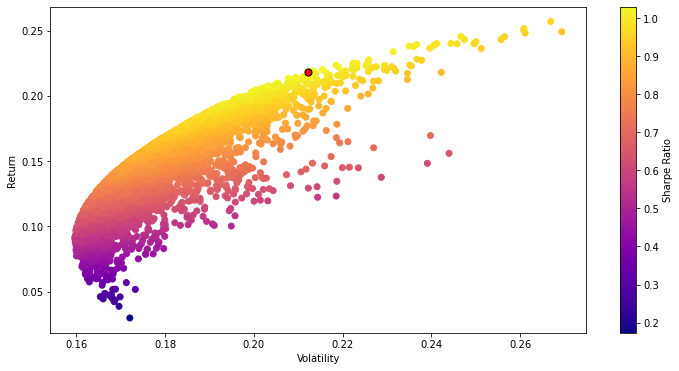

In [132]:
plt.figure(figsize=(12,6))
plt.scatter(vol_arr, ret_arr, c= sharpe_arr, cmap = 'plasma')
plt.colorbar(label = 'Sharpe Ratio')
plt.xlabel('Volatility')
plt.ylabel('Return')

plt.scatter(max_sr_vol, max_sr_ret, c='r', s = 50, edgecolors='black')

In [133]:
def get_ret_vol_sr(weights):
    weights = np.array(weights)
    ret = np.sum(log_ret.mean() * weights)*252
    vol = np.sqrt(np.dot(weights.T, np.dot(log_ret.cov()*252, weights)))
    sr = ret/vol
    return np.array([ret, vol, sr])

In [134]:
from scipy.optimize import minimize

In [136]:
def neg_sharpe(weights):
    return get_ret_vol_sr(weights)[2]*(-1)

In [137]:
def check_sum(weights):
    # return 0 if the sum of weights is 1
    # else it returns how off you are from 1
    return np.sum(weights) - 1

In [138]:
cons = ({'type':'eq', 'fun':check_sum})

In [139]:
bounds = ((0,1),(0,1),(0,1),(0,1))

In [140]:
init_guess = [0.25,0.25,0.25,0.25]

In [141]:
opt_results = minimize(neg_sharpe, init_guess, method='SLSQP', bounds=bounds, constraints=cons)

In [142]:
opt_results

     fun: -1.0307168703347112
     jac: array([ 5.64157963e-05,  4.18424606e-05,  3.39921728e-01, -4.45097685e-05])
 message: 'Optimization terminated successfully'
    nfev: 35
     nit: 7
    njev: 7
  status: 0
 success: True
       x: array([0.26628977, 0.20418983, 0.        , 0.5295204 ])

In [143]:
opt_results.x

array([0.26628977, 0.20418983, 0.        , 0.5295204 ])

In [144]:
get_ret_vol_sr(opt_results.x)

array([0.21885915, 0.21233683, 1.03071687])

In [145]:
# The efficient frontier is the set of optimal portfolios that offer the highest expected return 
# for a defined level of risk or the lowest risk for a given level of expected return. 
# Portfolios that lie below the efficient frontier are sub-optimal because 
# they do not provide enough return for the level of risk.

In [146]:
frontier_y = np.linspace(0,0.3,100)

In [148]:
def minimize_vol(weights):
    return get_ret_vol_sr(weights)[1]

In [149]:
frontier_volatility = []

for possible_return in frontier_y:
    cons = ({'type':'eq', 'fun':check_sum},
            {'type':'eq', 'fun': lambda w: get_ret_vol_sr(w)[0] - possible_return})
    
    result = minimize(minimize_vol, init_guess, method='SLSQP', bounds=bounds, constraints= cons)
    
    frontier_volatility.append(result['fun'])

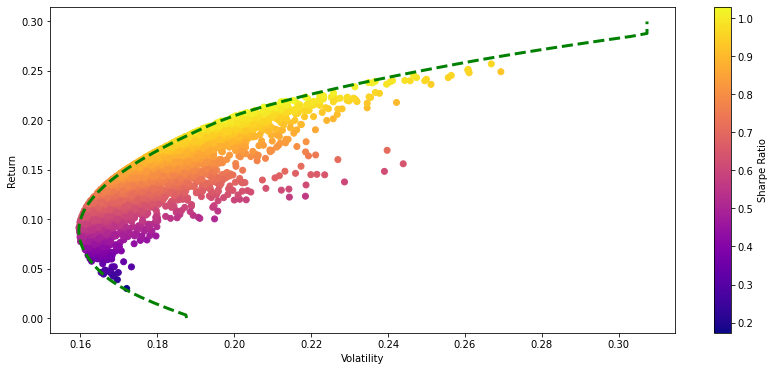

In [152]:
plt.figure(figsize = (14,6))
plt.scatter(vol_arr, ret_arr, c= sharpe_arr, cmap = 'plasma')
plt.colorbar(label = 'Sharpe Ratio')
plt.xlabel('Volatility')
plt.ylabel('Return')

plt.plot(frontier_volatility, frontier_y, 'g--', lw = 3)

In [153]:
# The above technique is called MARKOVITZ PORTFOLIO OPTIMIZATION

In [154]:
# CAPM - Capital Asset Pricing Model

In [155]:
from scipy import stats

In [156]:
help(stats.linregress)

Help on function linregress in module scipy.stats._stats_mstats_common:

linregress(x, y=None, alternative='two-sided')
    Calculate a linear least-squares regression for two sets of measurements.
    
    Parameters
    ----------
    x, y : array_like
        Two sets of measurements.  Both arrays should have the same length.  If
        only `x` is given (and ``y=None``), then it must be a two-dimensional
        array where one dimension has length 2.  The two sets of measurements
        are then found by splitting the array along the length-2 dimension. In
        the case where ``y=None`` and `x` is a 2x2 array, ``linregress(x)`` is
        equivalent to ``linregress(x[0], x[1])``.
    alternative : {'two-sided', 'less', 'greater'}, optional
        Defines the alternative hypothesis. Default is 'two-sided'.
        The following options are available:
    
        * 'two-sided': the slope of the regression line is nonzero
        * 'less': the slope of the regression line is l

In [263]:
import pandas_datareader as web

In [159]:
import nsepy as nse

In [171]:
nifty = nse.get_history(symbol = 'NIFTY', start = pd.to_datetime('2015-01-01'), end = pd.to_datetime('2018-12-31'), index = True)

In [189]:
nifty = nifty[['Open','High', 'Low', 'Close', 'Volume']]

In [190]:
nifty.head()

,Open,High,Low,Close,Volume
Date,,,,,
2015-01-01,8272.80,8294.70,8248.75,8284.00,56560411
2015-01-02,8288.70,8410.60,8288.70,8395.45,101887024
2015-01-05,8407.95,8445.60,8363.90,8378.40,118160545
2015-01-06,8325.30,8327.85,8111.35,8127.35,172799618
2015-01-07,8118.65,8151.20,8065.45,8102.10,164075424


In [203]:
dabur = nse.get_history(symbol = 'DABUR', start = pd.to_datetime('2015-01-01'), end = pd.to_datetime('2018-12-31'))

In [204]:
dabur = dabur[['Open','High', 'Low', 'Close', 'Volume']]

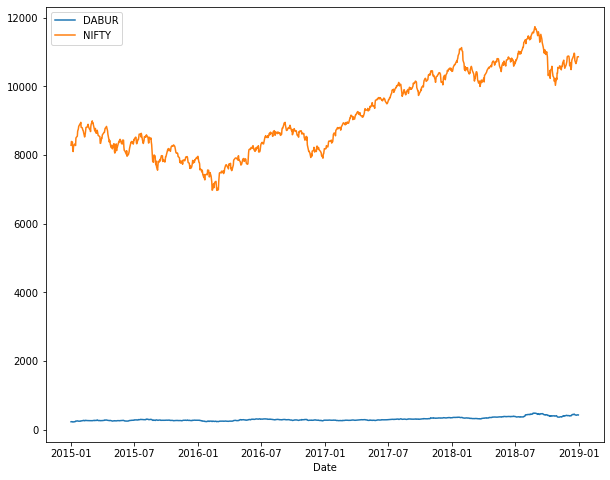

In [205]:
dabur['Close'].plot(label='DABUR', figsize = (10,8))
nifty['Close'].plot(label = 'NIFTY')
plt.legend()

In [206]:
dabur['Cumulative'] = dabur['Close']/dabur['Close'].iloc[0]
nifty['Cumulative'] = nifty['Close']/nifty['Close'].iloc[0]

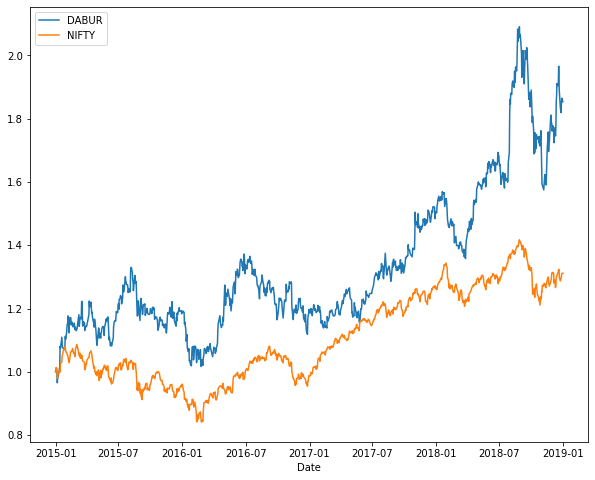

In [207]:
dabur['Cumulative'].plot(label = 'DABUR', figsize = (10,8))
nifty['Cumulative'].plot(label = 'NIFTY')
plt.legend()

In [208]:
dabur['Daily Return'] = dabur['Close'].pct_change(1)
nifty['Daily Return'] = nifty['Close'].pct_change(1)

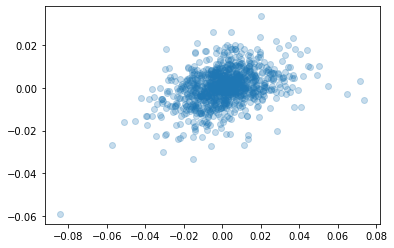

In [209]:
plt.scatter(dabur['Daily Return'], nifty['Daily Return'], alpha = 0.25)

In [210]:
beta, alpha, r_value, p_value, std_err = stats.linregress(dabur['Daily Return'].iloc[1:], nifty['Daily Return'].iloc[1:])

In [211]:
beta

0.20954949480767454

In [212]:
alpha

0.00015516260982819996

In [213]:
r_value

0.37875685002765386

In [214]:
# r_val = 38% means the regression doesnt fit good. (Not a good fit)
# Perhaps it means 38% of the points fit the linear regression

In [215]:
nifty['Daily Return'].head()

Date
2015-01-01         NaN
2015-01-02    0.013454
2015-01-05   -0.002031
2015-01-06   -0.029964
2015-01-07   -0.003107
Name: Daily Return, dtype: float64

In [216]:
noise = np.random.normal(0,0.002, len(nifty['Daily Return'].iloc[1:]))

In [222]:
# Created noise to fit since the DABUR and NIFTY didnt fit together. 
# We are doing this to confirm our CAPM model

In [220]:
fake_stock = nifty['Daily Return'].iloc[1:] + noise

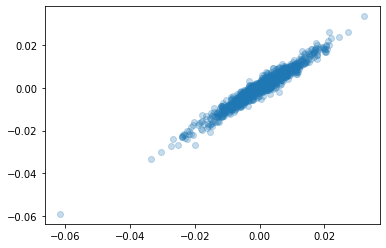

In [221]:
plt.scatter(fake_stock, nifty['Daily Return'].iloc[1:], alpha = 0.25)

In [223]:
beta, alpha, r_value, p_value, std_err = stats.linregress(fake_stock, nifty['Daily Return'].iloc[1:])

In [224]:
beta

0.9532753154391674

In [225]:
alpha

5.646188645111607e-05

In [226]:
r_value

0.9739111170382342

In [227]:
# We created fake_stock to prove that any stock moving along with the market has very high beta value (close to 1)
# and zero alpha value. Also, the r_value will be high (close to 1) as most points would fit the linear regression

In [228]:
import yfinance as yf

In [8]:
import pandas as pd
import numpy as np

In [9]:
start = pd.to_datetime('2015-01-01')
end = pd.to_datetime('2018-12-31')

In [244]:
# import requests
# link = 'https://finance.yahoo.com/quote/GOOG/history?period1=1420065000&period2=1609453799&interval=1d&frequency=1d&filter=history'
# r = requests.get(link, headers = {'User-Agent':'Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/91.0.4472.124 Safari/537.36'})
# pandas_data = pd.read_html(r.text)
# print(pandas_data)

In [254]:
tcs = yf.Ticker("TCS.NS")

In [261]:
web.DataReader('AAPL', data_source='yahoo', start = start, end = end)

RemoteDataError: Unable to read URL: https://finance.yahoo.com/quote/AAPL/history?period1=1420065000&period2=1546295399&interval=1d&frequency=1d&filter=history
Response Text:
b'<!DOCTYPE html>\n  <html lang="en-us"><head>\n  <meta http-equiv="content-type" content="text/html; charset=UTF-8">\n      <meta charset="utf-8">\n      <title>Yahoo</title>\n      <meta name="viewport" content="width=device-width,initial-scale=1,minimal-ui">\n      <meta http-equiv="X-UA-Compatible" content="IE=edge,chrome=1">\n      <style>\n  html {\n      height: 100%;\n  }\n  body {\n      background: #fafafc url(https://s.yimg.com/nn/img/sad-panda-201402200631.png) 50% 50%;\n      background-size: cover;\n      height: 100%;\n      text-align: center;\n      font: 300 18px "helvetica neue", helvetica, verdana, tahoma, arial, sans-serif;\n  }\n  table {\n      height: 100%;\n      width: 100%;\n      table-layout: fixed;\n      border-collapse: collapse;\n      border-spacing: 0;\n      border: none;\n  }\n  h1 {\n      font-size: 42px;\n      font-weight: 400;\n      color: #400090;\n  }\n  p {\n      color: #1A1A1A;\n  }\n  #message-1 {\n      font-weight: bold;\n      margin: 0;\n  }\n  #message-2 {\n      display: inline-block;\n      *display: inline;\n      zoom: 1;\n      max-width: 17em;\n      _width: 17em;\n  }\n      </style>\n  <script>\n    document.write(\'<img src="//geo.yahoo.com/b?s=1197757129&t=\'+new Date().getTime()+\'&src=aws&err_url=\'+encodeURIComponent(document.URL)+\'&err=%<pssc>&test=\'+encodeURIComponent(\'%<{Bucket}cqh[:200]>\')+\'" width="0px" height="0px"/>\');var beacon = new Image();beacon.src="//bcn.fp.yahoo.com/p?s=1197757129&t="+new Date().getTime()+"&src=aws&err_url="+encodeURIComponent(document.URL)+"&err=%<pssc>&test="+encodeURIComponent(\'%<{Bucket}cqh[:200]>\');\n  </script>\n  </head>\n  <body>\n  <!-- status code : 404 -->\n  <!-- Not Found on Server -->\n  <table>\n  <tbody><tr>\n      <td>\n      <img src="https://s.yimg.com/rz/p/yahoo_frontpage_en-US_s_f_p_205x58_frontpage.png" alt="Yahoo Logo">\n      <h1 style="margin-top:20px;">Will be right back...</h1>\n      <p id="message-1">Thank you for your patience.</p>\n      <p id="message-2">Our engineers are working quickly to resolve the issue.</p>\n      </td>\n  </tr>\n  </tbody></table>\n  </body></html>'

In [11]:
from pandas_datareader import data as pdr
#import fix_yahoo_finance

In [2]:
import yfinance as yf

In [4]:
from datetime import datetime

In [12]:
yf.pdr_override() 

stocks = ["AAPL","MSFT"]


f = pdr.get_data_yahoo(stocks, start=start, end=end)

[*********************100%***********************]  2 of 2 completed


In [14]:
df = pdr.get_data_yahoo('TATAMOTORS.NS', start=start, end=end)

[*********************100%***********************]  1 of 1 completed


In [16]:
import pandas_datareader as web

In [ ]:
web.data.get_data_yahoo()

In [2]:
import pandas as pd
import numpy as np
import yfinance as yf
import pandas_datareader as web

In [4]:
yf.pdr_override()

In [7]:
tata = web.data.get_data_yahoo('TATAMOTORS.NS', start = pd.to_datetime('2010-01-01'), end = pd.to_datetime('2018-01-31'))

[*********************100%***********************]  1 of 1 completed


In [10]:
import matplotlib.pyplot as plt
%matplotlib inline

<AxesSubplot:xlabel='Date'>

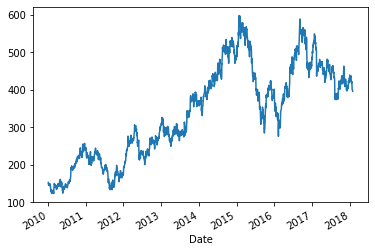

In [12]:
tata['Adj Close'].plot()

In [13]:
tata = web.data.get_data_yahoo('TATAMOTORS.BO', start = pd.to_datetime('2010-01-01'), end = pd.to_datetime('2018-01-31'))

[*********************100%***********************]  1 of 1 completed


<AxesSubplot:xlabel='Date'>

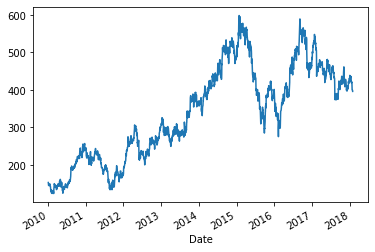

In [15]:
tata['Adj Close'].plot()

In [31]:
sbi = web.data.get_data_yahoo('SBIN.NS', start = pd.to_datetime('2010-01-01'), end = pd.to_datetime('2021-08-17'))

[*********************100%***********************]  1 of 1 completed


<AxesSubplot:xlabel='Date'>

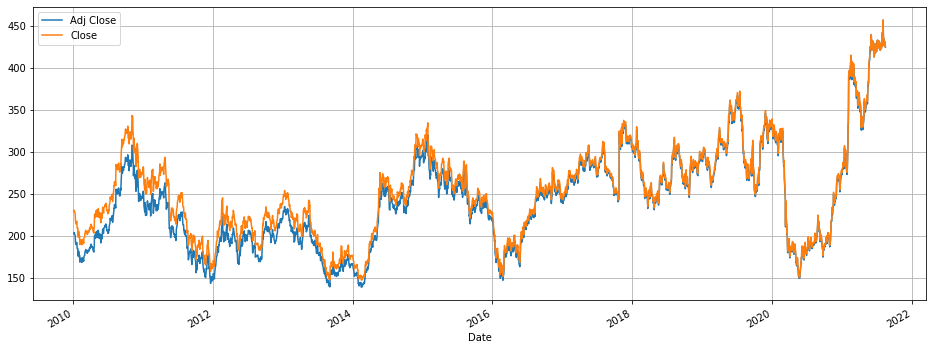

In [32]:
sbi[['Adj Close','Close']].plot(figsize=(16,6), grid = 1)

In [38]:
tata_yf = web.data.get_data_yahoo('TATAMOTORS.NS', start = pd.to_datetime('2010-01-01'), end = pd.to_datetime('2021-08-17'))

[*********************100%***********************]  1 of 1 completed


In [39]:
tata_yf

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2010-01-04,156.303482,164.040497,156.184769,163.535919,153.140778,27906448
2010-01-05,162.259598,167.147186,153.246277,160.686478,150.472488,23669317
2010-01-06,162.200241,162.932388,159.311234,160.933823,150.704086,14990820
2010-01-07,161.171280,161.923218,154.344498,155.432831,145.552780,22722030
2010-01-08,156.323273,159.251862,155.343781,156.283707,146.349548,16495776


In [33]:
import nsepy as nse

In [35]:
tata_nse = nse.get_history('TATAMOTORS', start = pd.to_datetime('2010-01-01'), end = pd.to_datetime('2021-08-17'))

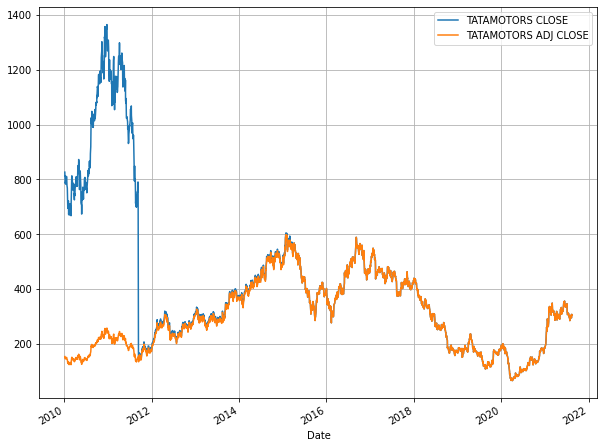

In [48]:
tata_nse['Close'].plot(figsize = (10,8), label = 'TATAMOTORS CLOSE')
tata_yf['Adj Close'].plot(label = 'TATAMOTORS ADJ CLOSE', grid = 1)
plt.legend()